In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('/home/panchoz/Documents/github/data/GHDomains.csv')

# drop unreachable repos
df = df[df['Status']==True].reset_index(drop=True)
text = df['clean_description'] + df['clean_readme']

# drop empty descp + readme text repos
to_drop = []
for i in text.index:
    if not isinstance(text.loc[i], str):
        to_drop.append(i)

text = text.drop(to_drop).reset_index(drop=True)
y = df['Domain'].drop(to_drop).reset_index(drop=True)

# split data
X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
def word_count(text):
    return len(text.split())

In [67]:
def bigbird(word_count):
    if word_count > 4096:
        return False
    else:
        return True

In [68]:
X_train = pd.DataFrame(X_train, columns=["Text"])
X_train['word_count'] = X_train['Text'].apply(word_count)
X_train['bigbird'] = X_train['word_count'].apply(bigbird)
X_train['label'] = y_train

X_test = pd.DataFrame(X_test, columns=["Text"])
X_test['word_count'] = X_test['Text'].apply(word_count)
X_test['bigbird'] = X_test['word_count'].apply(bigbird)
X_test['label'] = y_test

In [69]:
X_train['word_count'].describe()

count     3909.000000
mean       846.242773
std       1431.686197
min          6.000000
25%        236.000000
50%        461.000000
75%        913.000000
max      22499.000000
Name: word_count, dtype: float64

In [70]:
X_test['word_count'].describe()

count      978.000000
mean       947.539877
std       2541.246951
min          4.000000
25%        230.250000
50%        451.000000
75%        932.000000
max      42063.000000
Name: word_count, dtype: float64

(array([3.162e+03, 4.620e+02, 1.500e+02, 6.200e+01, 2.600e+01, 1.000e+01,
        4.000e+00, 1.000e+01, 3.000e+00, 2.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([6.000000e+00, 1.130650e+03, 2.255300e+03, 3.379950e+03,
        4.504600e+03, 5.629250e+03, 6.753900e+03, 7.878550e+03,
        9.003200e+03, 1.012785e+04, 1.125250e+04, 1.237715e+04,
        1.350180e+04, 1.462645e+04, 1.575110e+04, 1.687575e+04,
        1.800040e+04, 1.912505e+04, 2.024970e+04, 2.137435e+04,
        2.249900e+04]),
 <BarContainer object of 20 artists>)

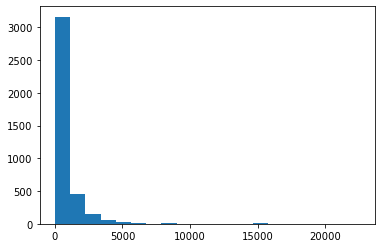

In [71]:
plt.hist(X_train['word_count'], bins=20)

(array([906.,  49.,  11.,   5.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.]),
 array([4.000000e+00, 2.106950e+03, 4.209900e+03, 6.312850e+03,
        8.415800e+03, 1.051875e+04, 1.262170e+04, 1.472465e+04,
        1.682760e+04, 1.893055e+04, 2.103350e+04, 2.313645e+04,
        2.523940e+04, 2.734235e+04, 2.944530e+04, 3.154825e+04,
        3.365120e+04, 3.575415e+04, 3.785710e+04, 3.996005e+04,
        4.206300e+04]),
 <BarContainer object of 20 artists>)

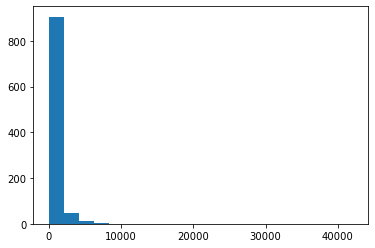

In [72]:
plt.hist(X_test['word_count'], bins=20)

In [82]:
X_train.value_counts(subset='label').sum()

3909

In [ ]:
X_train.value_counts(subset='label')

In [80]:
X_test.shape[0] - X_test[X_test['bigbird'] == True].shape[0]

26

In [81]:
X_test.value_counts(subset='label')

label
Web libraries and frameworks        302
Non-web libraries and frameworks    282
Software tools                      192
Application software                 84
Documentation                        83
System software                      35
dtype: int64

In [86]:
X_train[X_train['bigbird'] == False]

,Text,word_count,bigbird,label
4272,[DEPRECATED]WARNING: THIS PROJECT IS DEPRECATE...,6276,False,Non-web libraries and frameworks
2373,[DEPRECATED]WARNING: THIS PROJECT IS DEPRECATE...,5650,False,Non-web libraries and frameworks
831,"Disque is a distributed message brokerDisque, ...",11699,False,Non-web libraries and frameworks
410,Classy web-development dressed in a DSL (offic...,7049,False,Web libraries and frameworks
56,Command-line program to download videos from Y...,10713,False,Application software
...,...,...,...,...
808,Objective-C JSONJSONKit JSONKit is dual licens...,4494,False,Non-web libraries and frameworks
3173,Zen and the Art of the Objective-C Craftsmansh...,12856,False,Documentation
2449,An XCode project template to build universal f...,4175,False,Non-web libraries and frameworks
141,An open source iOS framework for GPU-based ima...,9173,False,Non-web libraries and frameworks


In [104]:
with open('data/train_outliers.txt', 'w') as f:
    for index, row in X_train[X_train['bigbird'] == False].iterrows():
        f.write(' #'*20+ '\n')
        f.write(f' Repository: {df.iloc[index].Name}, index: {index}, word count: {row.word_count} \n')
        f.write(' #'*20+ '\n' + '\n')
        f.write(row['Text'] + '\n' + '\n')

In [87]:
X_test[X_test['bigbird'] == False]

,Text,word_count,bigbird,label
2780,:book: For those who wanna learn Bashbash-hand...,4634,False,Documentation
1299,Track changes to your rails modelsPaperTrail T...,4676,False,Non-web libraries and frameworks
130,Amazon Web Services a practical guideThe Open...,42063,False,Documentation
897,:mortar_board: All things Vim! Chinese | Japan...,14364,False,Software tools
4849,Infrared remote library for Arduino: send and ...,4128,False,Non-web libraries and frameworks
3407,Smart LESS CSS mixins library. lesshat Downloa...,7286,False,Web libraries and frameworks
1503,[DEPRECATED]WARNING: THIS PROJECT IS DEPRECATE...,5533,False,Non-web libraries and frameworks
1849,A utility for arming (creating) many bees (mic...,7344,False,Software tools
476,AngularJS service to handle Rest API Restful R...,6049,False,Web libraries and frameworks
2739,The SDK for Jetpac's iOS Deep Belief image rec...,4932,False,Non-web libraries and frameworks


In [105]:
with open('data/test_outliers.txt', 'w') as f:
    for index, row in X_test[X_test['bigbird'] == False].iterrows():
        f.write(' #'*20+ '\n')
        f.write(f' Repository: {df.iloc[index].Name}, index: {index}, word count: {row.word_count} \n')
        f.write(' #'*20+ '\n' + '\n')
        f.write(row['Text'] + '\n' + '\n')